In [1]:
#https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis
#https://github.com/HoussemHosni/EDA-on-Haberman-Cancer-Survival-Data-set/blob/master/HabermanEDA_HH.ipynb    
    
# Importing packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("haberman.csv")
df.head(15)

,Age,OP_year,Axil_nodes_det,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [3]:
df.shape


(306, 4)

we have 4 features in our dataset & 306 rows

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age               306 non-null int64
OP_year           306 non-null int64
Axil_nodes_det    306 non-null int64
Surv_status       306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None



#Above result ensures that there is no missing value


In [5]:
df.Surv_status.value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

#here we have two classes.Class 1 has 225 data points whereas class 2 has 81 data points.We can conclude that we have imbalanced dataset.


In [6]:
df.describe()

,Age,OP_year,Axil_nodes_det,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Statistical observation
1)The age of the patients vary from 30 to 83 with the median of 52.
2)The number of Auxilary nodes detected vary from 0 to 52 (probably an outlier) with the median of 1 and mean of 4.
3)75% of data points have less than 5 detected axilary nodes and nearly 25% have 1 detected axilary nodes

# Objective
Our Objective is to perform different operations on haberman dataset from which we could easily
differentiate whether it belongs to survival status of type 1 or type 2

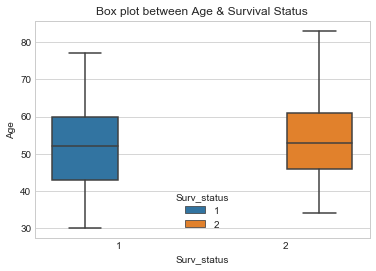

In [69]:
#Box plot on the basis of Age
sns.boxplot(x='Surv_status',y='Age',data=df,hue='Surv_status')
plt.title('Box plot between Age & Survival Status')
plt.show()


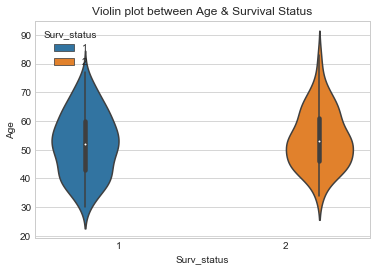

In [70]:
#Violin plot on the basis of Age
sns.violinplot(x='Surv_status',y='Age',data=df,hue='Surv_status')
plt.title('Violin plot between Age & Survival Status')
plt.show()

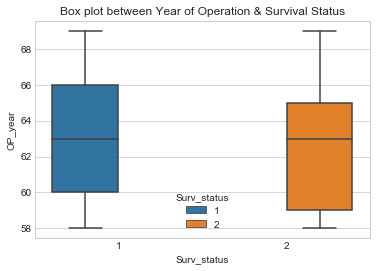

In [71]:
#Box plot on the basis of operation year
sns.boxplot(x='Surv_status',y='OP_year',data=df,hue='Surv_status')
plt.title('Box plot between Year of Operation & Survival Status')
plt.show()


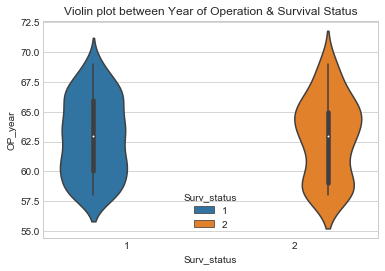

In [72]:
#Violin plot on the basis of operation year
sns.violinplot(x='Surv_status',y='OP_year',data=df,hue='Surv_status')
plt.title('Violin plot between Year of Operation & Survival Status')
plt.show()

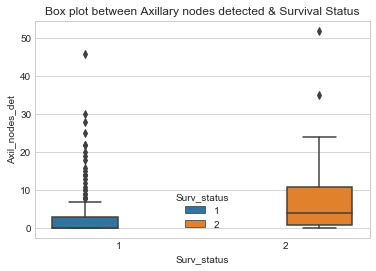

In [73]:
#Box plot on the basis of axil_nodes
sns.boxplot(x='Surv_status',y='Axil_nodes_det',data=df,hue='Surv_status')
plt.title('Box plot between Axillary nodes detected & Survival Status')
plt.show()



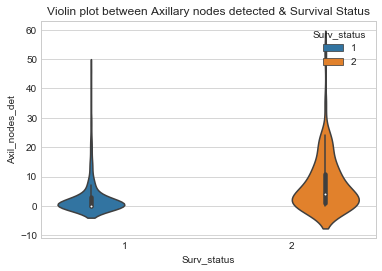

In [74]:
#Violin plot on the basis of axil_nodes
sns.violinplot(x='Surv_status',y='Axil_nodes_det',data=df,hue='Surv_status')
plt.title('Violin plot between Axillary nodes detected & Survival Status')
plt.show()


In [13]:
#first dataframe for survived status type 1
S=df.loc[df['Surv_status']==1]
S.head()


,Age,OP_year,Axil_nodes_det,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [14]:
#second dataframe for survived status type 2
NS=df.loc[df['Surv_status']==2]
NS.head()

,Age,OP_year,Axil_nodes_det,Surv_status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


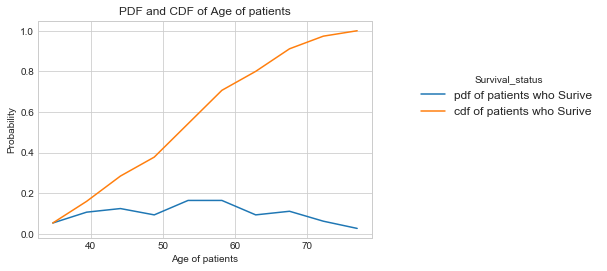

In [49]:
#PDF and CDF on Age (First DataFrame)
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

counts, bin_edges = np.histogram(S['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of patients who Surive ')
plt.title('PDF and CDF of Age of patients')
plt.xlabel('Age of patients')
plt.ylabel('Probability')
plt.plot(bin_edges[1:], cdf,label='cdf of patients who Surive')
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0, 0.5, 0.8), title='Survival_status', fontsize='large')
plt.show()




[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


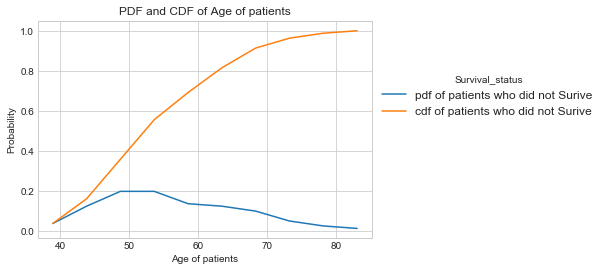

In [50]:
#PDF and CDF on Age (Second DataFrame)
counts, bin_edges = np.histogram(NS['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of patients who did not Surive ')
plt.title('PDF and CDF of Age of patients')
plt.xlabel('Age of patients')
plt.ylabel('Probability')
plt.plot(bin_edges[1:], cdf,label='cdf of patients who did not Surive')
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0, 0.5, 0.8), title='Survival_status', fontsize='large')
plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


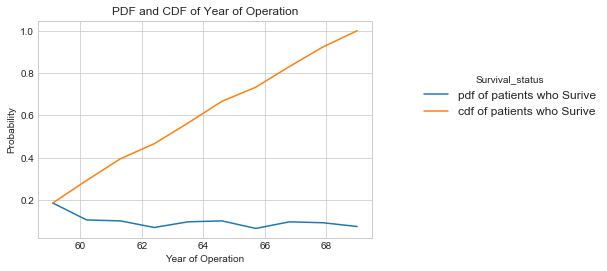

In [56]:
#PDF and CDF on OperationYear (First DataFrame)
counts, bin_edges = np.histogram(S['OP_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of patients who Surive');
plt.title('PDF and CDF of Year of Operation')
plt.xlabel('Year of Operation')
plt.ylabel('Probability')
plt.plot(bin_edges[1:], cdf,label='cdf of patients who Surive')
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0, 0.5, 0.8), title='Survival_status', fontsize='large')
plt.show()

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


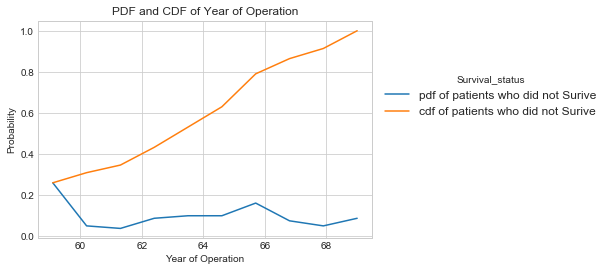

In [57]:
#PDF and CDF on OperationYear (Second DataFrame)
counts, bin_edges = np.histogram(NS['OP_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of patients who did not Surive');
plt.title('PDF and CDF of Year of Operation')
plt.xlabel('Year of Operation')
plt.ylabel('Probability')
plt.plot(bin_edges[1:], cdf,label='cdf of patients who did not Surive')
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0, 0.5, 0.8), title='Survival_status', fontsize='large')
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


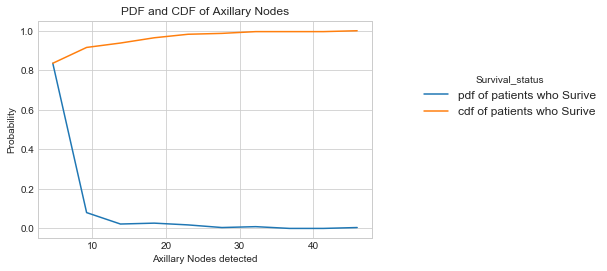

In [53]:
#PDF and CDF on Axil Nodes (First DataFrame)
counts, bin_edges = np.histogram(S['Axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of patients who Surive')
plt.title('PDF and CDF of Axillary Nodes')
plt.xlabel('Axillary Nodes detected')
plt.ylabel('Probability')
plt.plot(bin_edges[1:], cdf,label='cdf of patients who Surive')
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0, 0.5, 0.8), title='Survival_status', fontsize='large')         
plt.show()


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


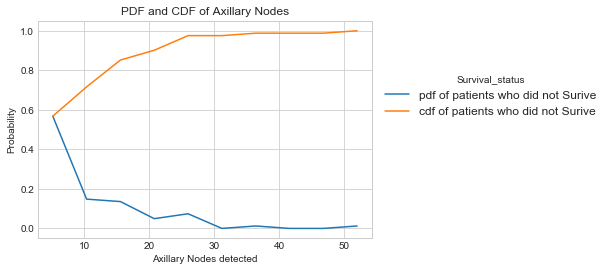

In [54]:
 #PDF and CDF on Axil Nodes (second DataFrame)
counts, bin_edges = np.histogram(NS['Axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of patients who did not Surive');
plt.title('PDF and CDF of Axillary Nodes')
plt.xlabel('Axillary Nodes detected')
plt.ylabel('Probability')
plt.plot(bin_edges[1:], cdf,label='cdf of patients who did not Surive')
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0, 0.5, 0.8), title='Survival_status', fontsize='large')
plt.show()
    

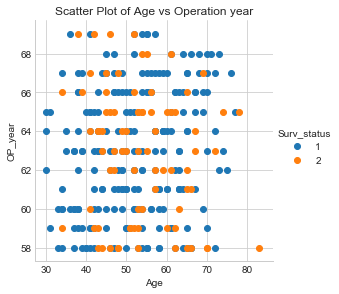

In [58]:
#Scatter Plot of Age vs operation year
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Surv_status',size=4).map(plt.scatter,'Age','OP_year').add_legend()
plt.title('Scatter Plot of Age vs Operation year')
plt.show()

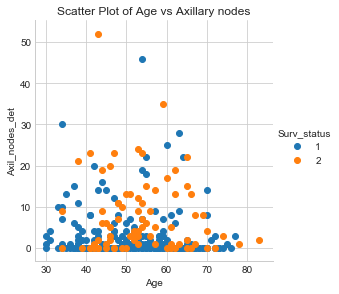

In [59]:
#Scatter Plot of Age vs Axil nodes
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Surv_status',size=4).map(plt.scatter,'Age','Axil_nodes_det').add_legend()
plt.title('Scatter Plot of Age vs Axillary nodes')
plt.show()

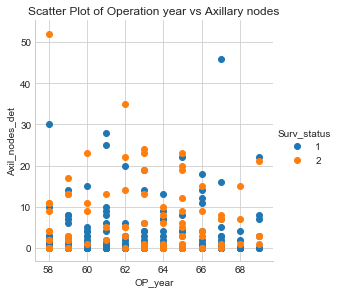

In [60]:
#Scatter Plot of Operation year vs Axil nodes
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Surv_status',size=4).map(plt.scatter,'OP_year','Axil_nodes_det').add_legend()
plt.title('Scatter Plot of Operation year vs Axillary nodes')
plt.show()


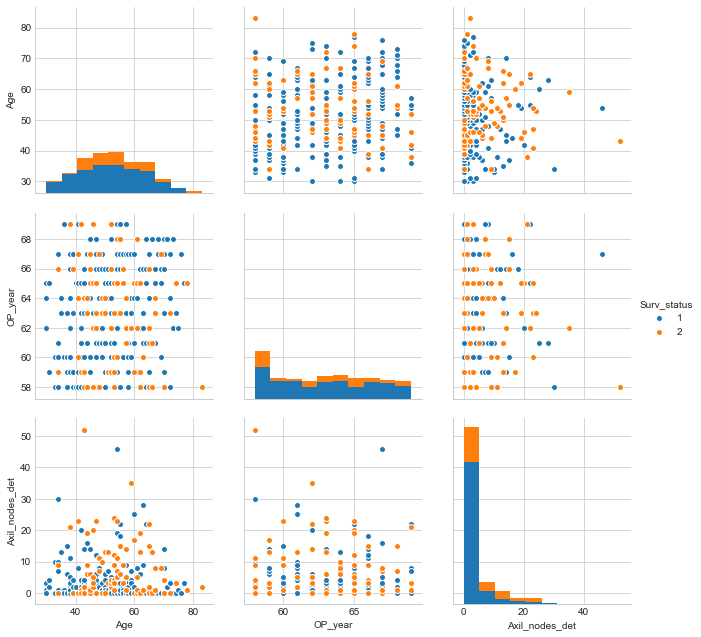

In [62]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Surv_status", size=3, vars=['Age', 'OP_year','Axil_nodes_det']);
plt.show()